## GettingStarted.ipynb

In this code, we will run basic Python code to make sure Python is properly installed on your device.

Code for the Chicago Booth course on Quantitative Portfolio Management by Ralph S.J. Koijen and Federico Mainardi.

### 1. Importing Packages

This notebook tests that your Python installation works. 

- You can download the data from: https://www.dropbox.com/scl/fo/hrjspow2cpstfnoeqb23v/h?rlkey=j4fohf1s4e6fdy49p7bs71b7l&dl=0.
- Please copy the files in the Data folder: `GettingStartedSample.parquet` to a local folder. The ideal file structure is to have one folder `Code` and one folder `Data`. E.g., the folders would be C:/QPM/Data and C:/QPM/Code.

Now we're ready to start! The goal is not to understand the code yet (we will by the end of the course); just to see that your Python installation works.

Every box that has "[]:" in front of it needs to be run. To run it, put your cursor in the box and then push the "play button" on top. Alternatively, you can press "shift+enter" (or "shift+return" on a Mac).

In [40]:
# Load the relevant libraries
!pip install matplotlib
!pip install pyarrow
!pip install fastparquet



import pandas as pd 
import matplotlib.pyplot as plt
import wrds

print('Libraries successfully imported..!')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.7/681.7 kB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.2 MB/s eta 0:00:00a 0:00:01
Libraries successfully imported..!


Before we get started, make sure to enter the path to your directory that contains the data.

In [41]:
# Modify this line so it points to the path where you stored the data
_DATA_DIR = '../Data'      

### 2. Loading Data

We will use datasets with `.parquet` format, which is an efficient way to compress files. To import `.parquet` files, we use the `read_parquet` function in the `pandas` package.

In [43]:

df = pd.read_parquet('%s/GettingStartedSample.parquet' %(_DATA_DIR)).set_index('date')
print(df.head(5))
print('\nData successfully loaded!')

            permno       prc          comnam
date                                        
2001-01-01   84788  0.865625  AMAZON COM INC
2001-02-01   84788  0.509375  AMAZON COM INC
2001-03-01   84788  0.511500  AMAZON COM INC
2001-04-01   84788  0.789000  AMAZON COM INC
2001-05-01   84788  0.834500  AMAZON COM INC

Data successfully loaded!


### 3. Plotting Data

We will plot the share price of Amazon to make sure we can create figures.

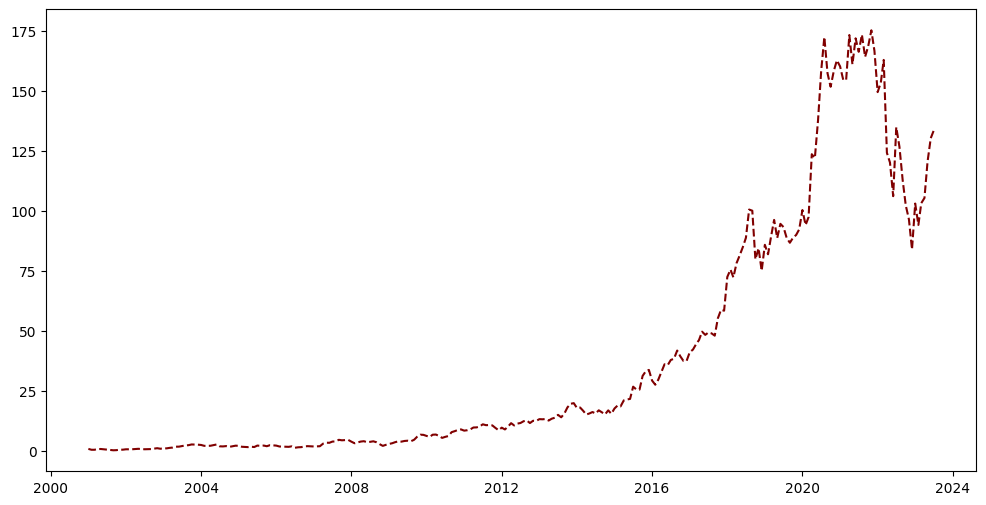

In [44]:
fig = plt.figure(figsize = (12, 6))
plt.plot(df[['prc']], color = 'maroon', linestyle = '--')
plt.show()
plt.close()

### 4. Downloading data from WRDS

Throughout the course, you will be able use data already prepared for you. Alternatively, you may also decide to download and construct datasets directly from WRDS. This choice is advisable for those of you that would like to keep using these scripts in the future. In order to download and construct data directly from WRDS, we proceed in three steps:
1. Make sure to have a WRDS account with associated username and password.
2. A message will appear in the cell output. This is Python asking for your username and password. Type your username and press Enter. Type your password and press Enter.
3. For the third question, you can select `n`.

If all is set up well, you will be able to download the data directly.

In [48]:
# Establish connection with wrds
db = wrds.Connection()  

# Select the relevant data
df_wrds = db.raw_sql("""
                        SELECT a.date, a.prc, a.cfacshr, b.ticker, b.comnam
                        FROM crsp_m_stock.msf as a 
                        LEFT JOIN crsp_m_stock.msenames as b
                        ON a.permno=b.permno AND b.namedt<=a.date AND a.date<=b.nameendt
                        WHERE a.date >= '2001-01-01' AND a.date <= '2023-07-31' AND b.ticker = 'AMZN'
                     """)

# Set the date variable as the index
df_wrds = df_wrds.set_index('date')

# Adjust prices for stock splits and reverse splits
df_wrds['prc'] = df_wrds['prc']/df_wrds['cfacshr']

print(df_wrds.head(5))
print('\nData successfully downloaded!')

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done
                 prc  cfacshr ticker          comnam
date                                                
2001-01-31  0.865625     20.0   AMZN  AMAZON COM INC
2001-02-28  0.509375     20.0   AMZN  AMAZON COM INC
2001-03-30  0.511500     20.0   AMZN  AMAZON COM INC
2001-04-30  0.789000     20.0   AMZN  AMAZON COM INC
2001-05-31  0.834500     20.0   AMZN  AMAZON COM INC

Data successfully downloaded!
